In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from datetime import datetime, timezone
import zoneinfo           # Python 3.9+
import glob 

# Loop over several files
# Example file path
# file = '/Users/bradlipovsky/raid1/exps/rainier/Phase_1_manuela/20250713/200Hz/045008.hdf5'

file_list = glob.glob('/Users/bradlipovsky/raid1/exps/rainier/Phase_1_manuela/20250713/200Hz/04*.hdf5')
file_list= sorted(file_list)
for i,file in enumerate(file_list):
    
    f = h5py.File(file, 'r')
    this_data = np.array(f['data'])
    if i == 0:
        data= this_data
        L = np.array(f['/header/spatialUnwrRange'])*np.array(f['/header/gaugeLength'])
        ts = np.array(f['/header/time'])
        dt = np.array(f['/header/dt'])
    else:
        data = np.concatenate((data, this_data), axis=0)

    dt_utc = datetime.utcfromtimestamp(float(ts)).replace(tzinfo=timezone.utc)
    f.close()

/var/folders/0h/cd1mwx2x6kx3zstszldf39zm0000gn/T/ipykernel_95826/558549778.py:28: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt_utc = datetime.utcfromtimestamp(float(ts)).replace(tzinfo=timezone.utc)


OSError: Unable to open file (truncated file: eof = 29032448, sblock->base_addr = 0, stored_eof = 33983992)

In [64]:
x = np.linspace(0, 1, data.shape[1]) * L
t0 = np.arange(0, data.shape[0]) * dt
t_arr = ts + t0
t = [datetime.fromtimestamp(float(t), tz=timezone.utc) for t in t_arr]

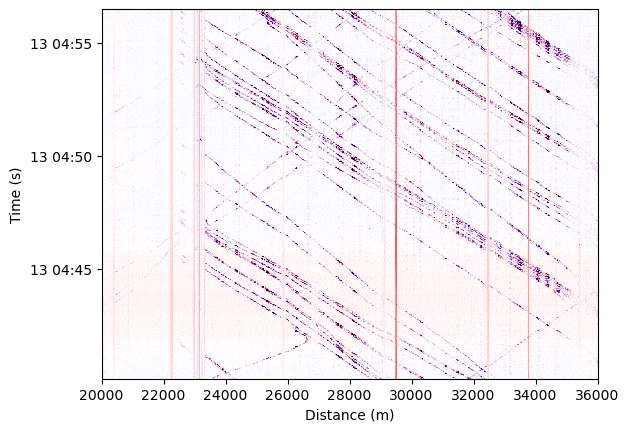

In [71]:
vm = 0.1

plt.imshow(data,vmin=-vm,vmax=vm, cmap='seismic', aspect='auto',
           extent=[x[0], x[-1], t[0], t[-1]])

# add another x axis to show index number
# plt.twiny()
# plt.xticks(np.arange(0, data.shape[1]) )

plt.ylabel('Time (s)')
plt.xlabel('Distance (m)')
plt.xlim([20000, 36000])
plt.show()

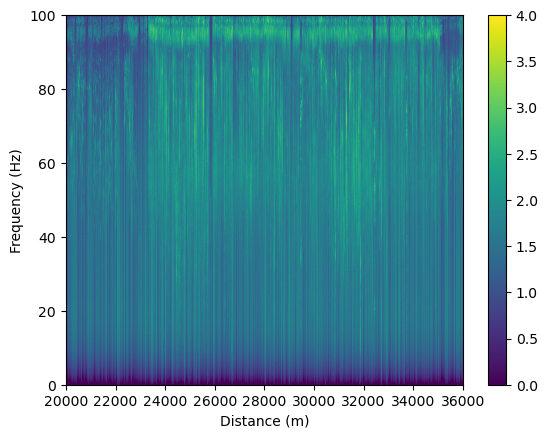

In [79]:
# Plot the fft of the data taken along the time axis
ft = np.fft.fft(data, axis=0)
f = np.fft.fftshift(np.fft.fftfreq(data.shape[0], dt))
plt.figure()
c=plt.imshow(np.log10(np.abs(ft)), aspect='auto',
           extent=[x[0], x[-1], f[0], f[-1]],
           cmap='viridis',vmin=0,vmax=4)
plt.colorbar(c)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Distance (m)')
plt.ylim([0,100])
plt.xlim([20000, 36000])
plt.show()

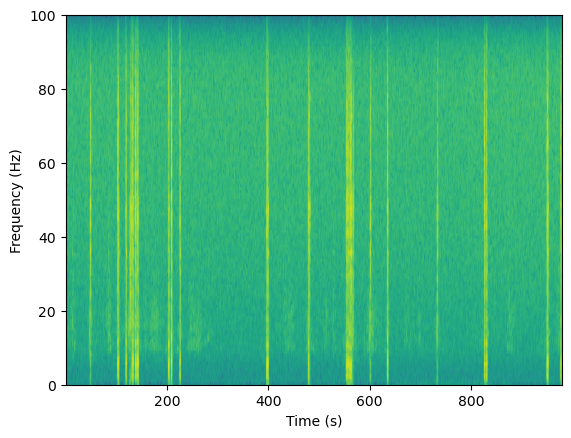

In [76]:
#plot a spectrogram of a single column of the data
plt.figure()
plt.specgram(data[:, 1250], Fs=1/dt, NFFT=256,
             noverlap=128, cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.show()